In [1]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
lf = pl.scan_csv('data/train.csv')

In [3]:
lf.collect_schema()

Schema([('row_id', Int64),
        ('timestamp', Int64),
        ('user_id', Int64),
        ('content_id', Int64),
        ('content_type_id', Int64),
        ('task_container_id', Int64),
        ('user_answer', Int64),
        ('answered_correctly', Int64),
        ('prior_question_elapsed_time', Float64),
        ('prior_question_had_explanation', Boolean)])

In [4]:
lf.head().collect()

row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
i64,i64,i64,i64,i64,i64,i64,i64,f64,bool
0,0,115,5692,0,1,3,1,null,null
1,56943,115,5716,0,2,2,1,37000.0,false
2,118363,115,128,0,0,0,1,55000.0,false
3,131167,115,7860,0,3,0,1,19000.0,false
4,137965,115,7922,0,4,1,1,11000.0,false


In [6]:
lf.select(pl.all().approx_n_unique()).collect(streaming=True)

row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
100887649,72894331,390688,13670,2,10013,5,3,3253,3


In [9]:
lf.select('content_type_id').unique().collect(streaming=True)

content_type_id
i64
0
1


In [10]:
lf.select('user_answer').unique().collect(streaming=True)

user_answer
i64
1
2
0
3
-1


In [11]:
lf.select('answered_correctly').unique().collect(streaming=True)

answered_correctly
i64
1
-1
0


In [12]:
lf.select('prior_question_had_explanation').unique().collect(streaming=True)

prior_question_had_explanation
bool
false
true
null


In [8]:
lf.select(pl.all().null_count()).collect(streaming=True)

row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,2351538,392506


In [15]:
dtypes = {
    'row_id': pl.Int64,
    'timestamp': pl.Int64,
    'user_id': pl.Int64,
    'content_id': pl.Int64,
    'content_type_id': pl.Int8,
    'task_container_id': pl.Int64,
    'user_answer': pl.Int8,
    'answered_correctly': pl.Int8,
    'prior_question_elapsed_time': pl.Float64,
    'prior_question_had_explanation': pl.Boolean
}

lf = pl.scan_csv('data/train.csv', schema_overrides=dtypes)

In [16]:
lf.collect_schema()

Schema([('row_id', Int64),
        ('timestamp', Int64),
        ('user_id', Int64),
        ('content_id', Int64),
        ('content_type_id', Int8),
        ('task_container_id', Int64),
        ('user_answer', Int8),
        ('answered_correctly', Int8),
        ('prior_question_elapsed_time', Float64),
        ('prior_question_had_explanation', Boolean)])

<Axes: ylabel='Count'>

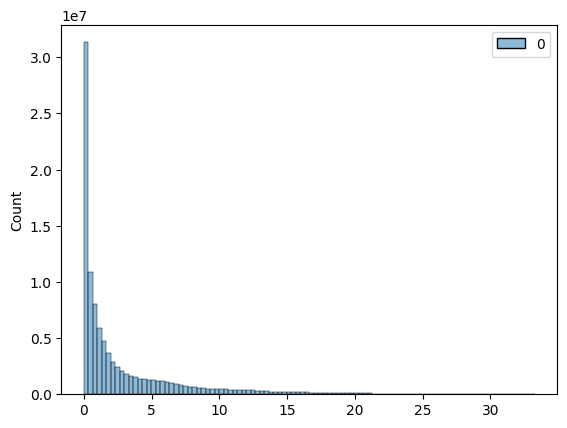

In [20]:
ts = lf.select('timestamp').collect(streaming=True) / (31536000000 / 12)
sns.histplot(data=ts, bins=100)

In [45]:
ds = lf.filter(
    pl.col('timestamp') == 0
).select(
    pl.col('timestamp').count().alias('timestamp_zeros'),
    pl.col('user_id').approx_n_unique().alias('unique_user_id')).collect(streaming=True)


In [44]:
ds

timestamp_zeros,uneque_user_id
u32,u32
396417,390688
